# Understanding Over & Underfitting
## Predicting Boston Housing Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

`crim`
per capita crime rate by town.

`zn`
proportion of residential land zoned for lots over 25,000 sq.ft.

`indus`
proportion of non-retail business acres per town.

`chas`
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

`nox`
nitrogen oxides concentration (parts per 10 million).

`rm`
average number of rooms per dwelling.

`age`
proportion of owner-occupied units built prior to 1940.

`dis`
weighted mean of distances to five Boston employment centres.

`rad`
index of accessibility to radial highways.

`tax`
full-value property-tax rate per $10,000.

`ptratio`
pupil-teacher ratio by town.

`black`
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

`lstat`
lower status of the population (percent).

`medv`
median value of owner-occupied homes in $1000s.

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
data = pd.read_csv("../data/boston_data.csv")

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
data.shape

(404, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

crim       402
zn          25
indus       69
chas         2
nox         76
rm         363
age        298
dis        339
rad          9
tax         61
ptratio     45
black      292
lstat      366
medv       200
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

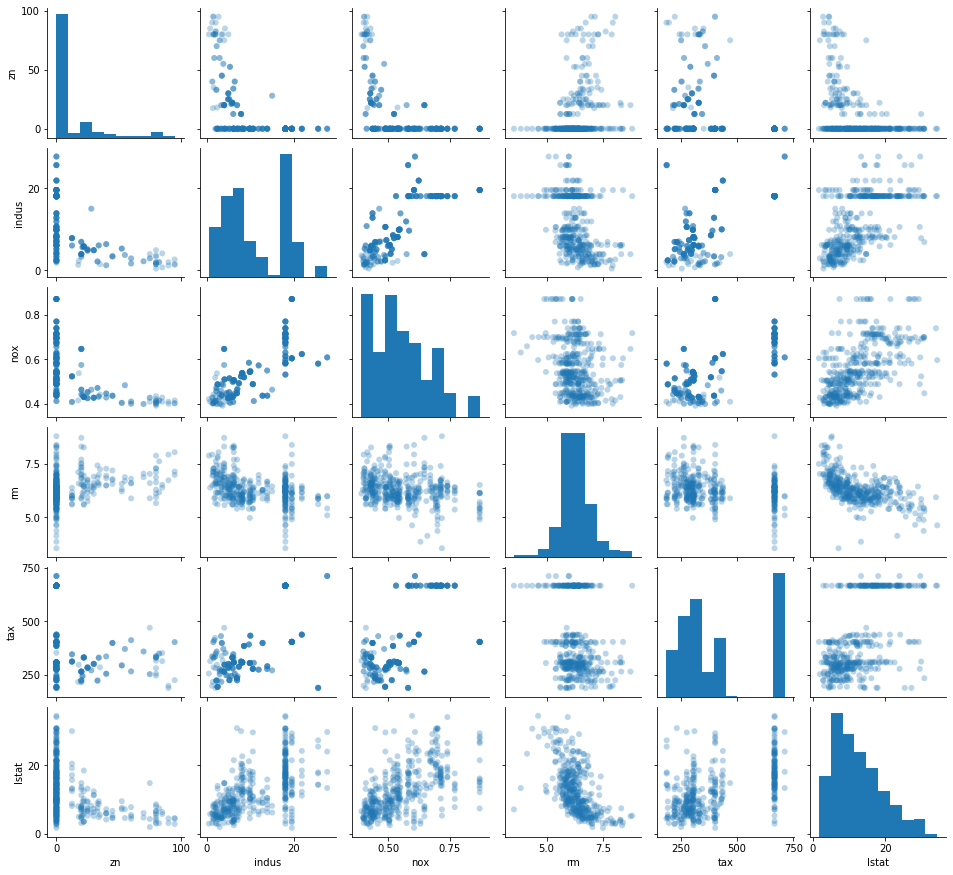

In [10]:
# Your plots here
columns = ["zn", "indus", "nox","rm", "tax","lstat"]
sns.pairplot(data[columns], plot_kws=dict(alpha=.3, edgecolor="none"), height=2, aspect=1.1)
sns.set_context("talk")

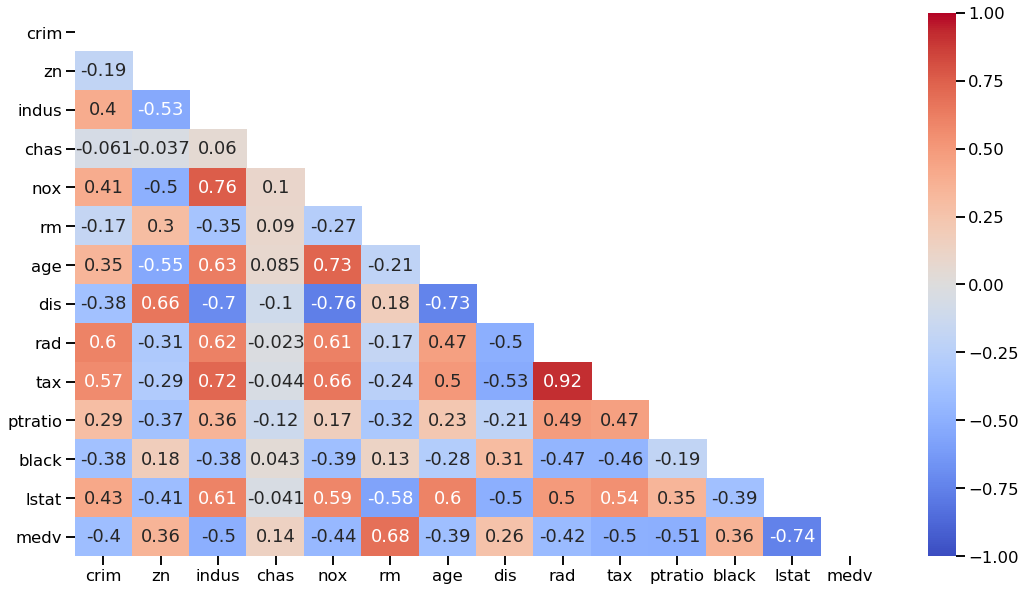

In [11]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), mask=mask, cmap="coolwarm", annot=True, vmin=-1, vmax=1) 
sns.set_context("talk")
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

Variables that correlate the most price are lstat, rm, ptratio indus and tax

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

I already did

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [12]:
data["medv"].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
# Your code here
X = data.drop(["medv"], axis=1)
y = data["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [20]:
# Five separate RFR here with the given max depths
max_depth = {'max_depth': [2, 4, 6, 8, 10]}
RandomForestReg = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=42), max_depth, cv=10)
RandomForestReg.fit(X_train, y_train)
print(RandomForestReg.best_params_)
print(RandomForestReg.best_estimator_)
train_scores = pd.DataFrame(RandomForestReg.cv_results_)

{'max_depth': 6}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [22]:
# Produce a plot with the score for the testing and training for the different max depths
RandomForestReg.fit(X_test, y_test)
print(RandomForestReg.best_params_)
print(RandomForestReg.best_estimator_)
test_scores = pd.DataFrame(RandomForestReg.cv_results_)

{'max_depth': 6}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


Now, plot the score for each tree on the training set and on the testing set.

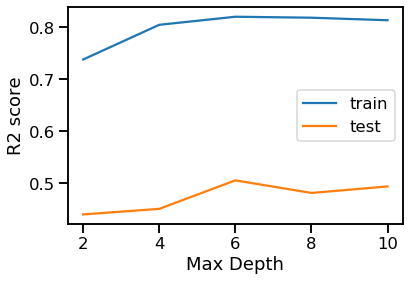

In [25]:
plt.plot(train_scores["param_max_depth"], train_scores["mean_test_score"])
plt.plot(test_scores["param_max_depth"], test_scores["mean_test_score"])
plt.legend(["train","test"])
plt.xlabel("Max Depth")
plt.ylabel("R2 score")

plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

Such a big difference between train and test means there's overfitting

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
max_depth = {'max_depth': [1]}
RandomForestReg = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=42), max_depth, cv=10)
RandomForestReg.fit(X_train, y_train)
print(RandomForestReg.best_params_)
print(RandomForestReg.best_estimator_)
train_scores = pd.DataFrame(RandomForestReg.cv_results_)

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
max_depth = {'max_depth': [2, 4, 6, 8, 10]}
RandomForestReg = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=42), max_depth, cv=10)
RandomForestReg.fit(X_train, y_train)
print(RandomForestReg.best_params_)
print(RandomForestReg.best_estimator_)
train_scores = pd.DataFrame(RandomForestReg.cv_results_)

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here